In [16]:
import pandas as pd
dataset=pd.read_csv("benin-malanville.csv")
dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [20]:
print("Summary Statistics:")
print(dataset.describe())

print("\nMissing Value Report:")
print(dataset.isna().sum())

# Identify columns with > 5% null values
total_rows = len(dataset)
print("\nColumns with > 5% Null Values:")
for col in dataset.columns:
    null_percentage = (dataset[col].isna().sum() / total_rows) * 100
    if null_percentage > 5:
        print(f"{col}: {null_percentage:.2f}% null")

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import the seaborn library

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=dataset['GHI'])
plt.title('GHI Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=dataset['DNI'])
plt.title('DNI Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=dataset['DHI'])
plt.title('DHI Boxplot')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['ModA'])
plt.title('ModA Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['ModB'])
plt.title('ModB Boxplot')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['WS'])
plt.title('WS Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['WSgust'])
plt.title('WSgust Boxplot')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [27]:
def calculate_z_score(df, col):  # The function still uses 'df' internally
    df[f'{col}_Z'] = (df[col] - df[col].mean()) / df[col].std()
    return df

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    dataset = calculate_z_score(dataset, col)  # Apply the function to 'dataset'

outlier_threshold = 3
outlier_rows_zscore = dataset[(dataset['GHI_Z'].abs() > outlier_threshold) |
                              (dataset['DNI_Z'].abs() > outlier_threshold) |
                              (dataset['DHI_Z'].abs() > outlier_threshold) |
                              (dataset['ModA_Z'].abs() > outlier_threshold) |
                              (dataset['ModB_Z'].abs() > outlier_threshold) |
                              (dataset['WS_Z'].abs() > outlier_threshold) |
                              (dataset['WSgust_Z'].abs() > outlier_threshold)]

print(f"\nNumber of rows with Z-score > {outlier_threshold} in key columns: {len(outlier_rows_zscore)}")
print("First few outlier rows (based on Z-score):")
print(outlier_rows_zscore.head())


Number of rows with Z-score > 3 in key columns: 7740
First few outlier rows (based on Z-score):
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
670  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
671  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
672  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
673  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
674  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
670     4.1      0.7  190.5     18.4  999         0            0.0   63.0   
671     4.1      0.6  175.8     13.3  999         0            0.0   63.7   
672     4.6      0.9  171.5     11.9  999         0            0.0   65.8   
673     5.6      0.6  160.7      8.0  999         0            0.0   65.4   
674     4.6      0.4  169.1     12.3 

In [28]:
# Example: Impute with median
for col in ['GHI', 'DNI', 'DHI']:
    dataset[col].fillna(dataset[col].median(), inplace=True)

# Verify
print("\nMissing values in GHI, DNI, DHI after imputation:")
print(dataset[['GHI', 'DNI', 'DHI']].isna().sum())

# Or drop rows with missing values (use with caution)
# dataset.dropna(inplace=True)
# print("\nNumber of rows after dropping NaN:", len(dataset))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8692\1956368712.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8692\1956368712.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Missing values in GHI, DNI, DHI after imputation:
GHI    0
DNI    0
DHI    0
dtype: int64


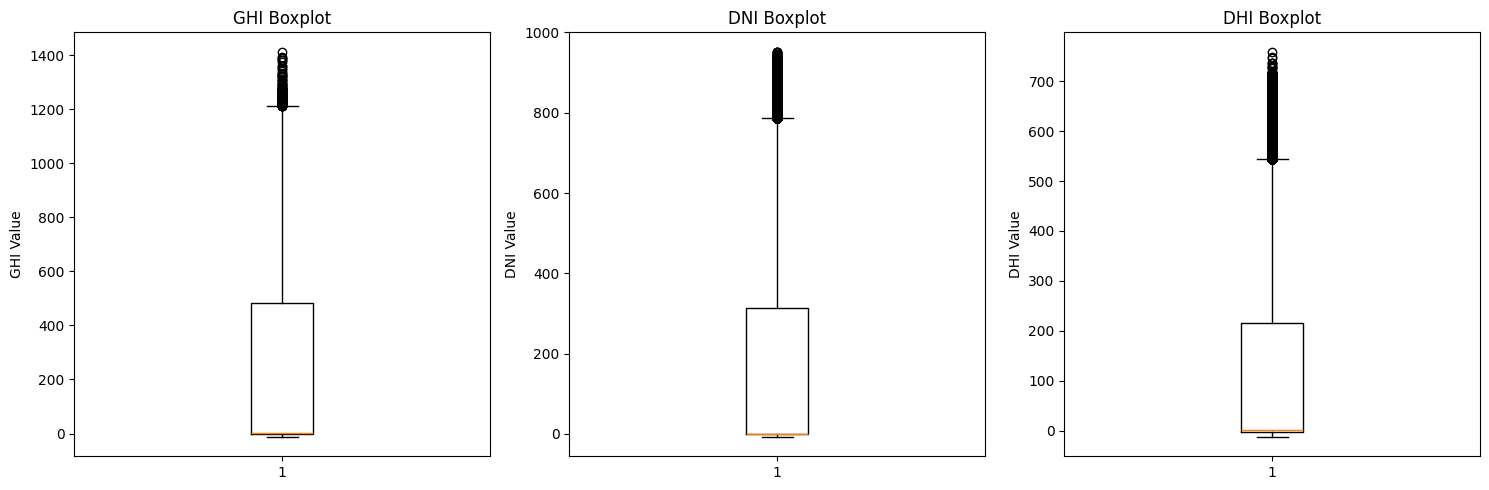

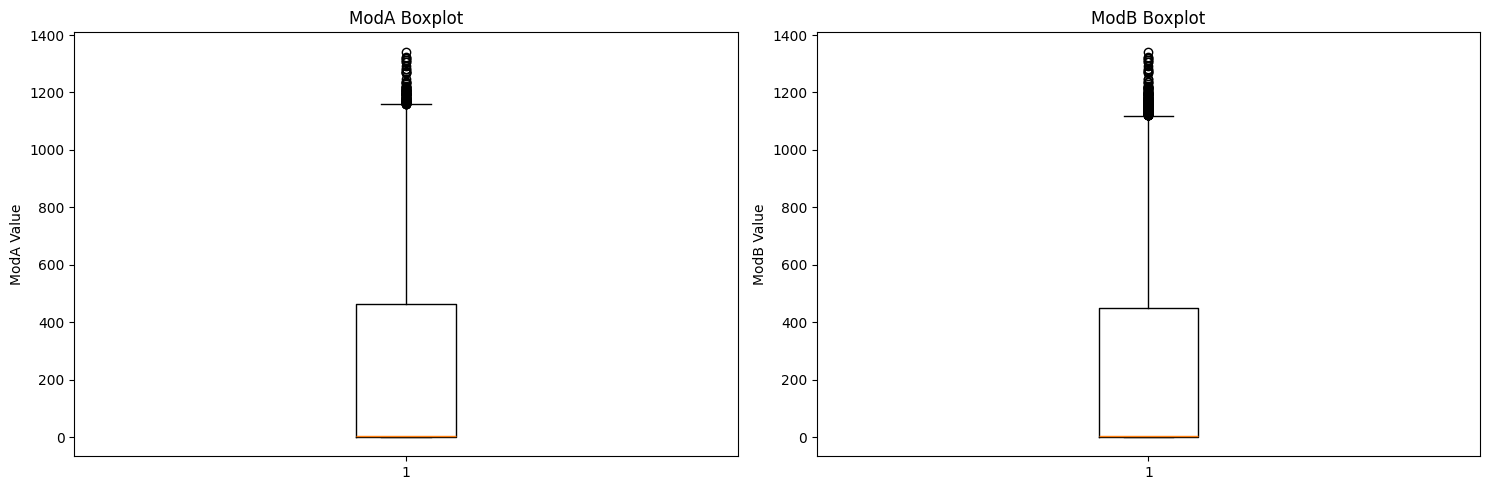

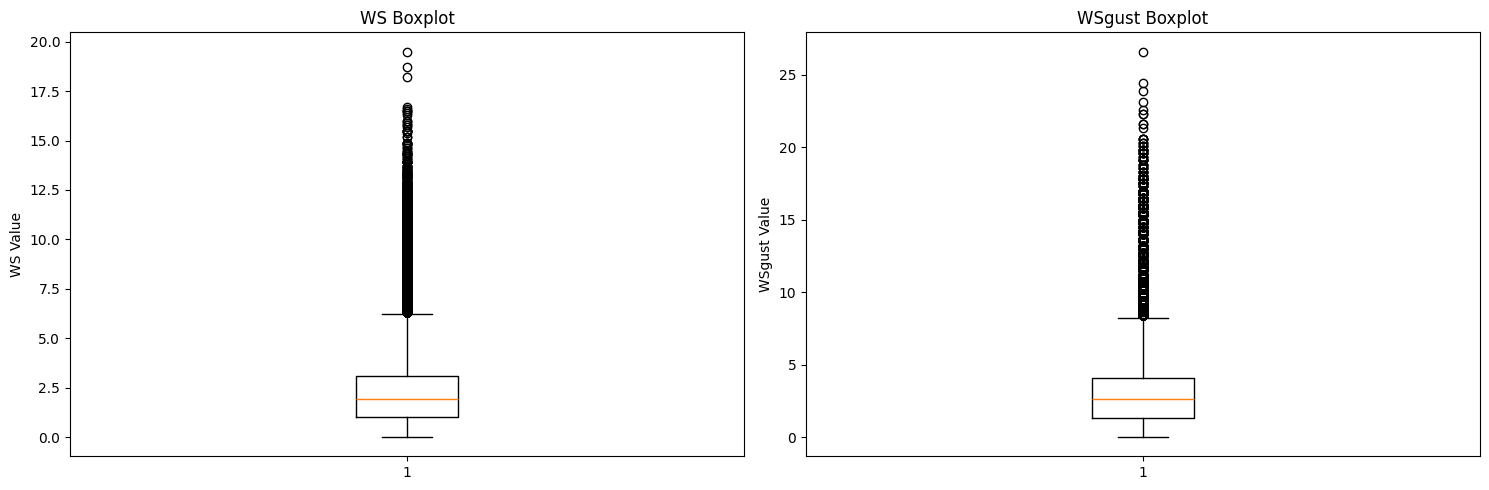

In [29]:
import matplotlib.pyplot as plt
import pandas as pd  

plt.figure(figsize=(15, 5))

# Boxplot for GHI
plt.subplot(1, 3, 1)
plt.boxplot(dataset['GHI'].dropna())  
plt.title('GHI Boxplot')
plt.ylabel('GHI Value')

# Boxplot for DNI
plt.subplot(1, 3, 2)
plt.boxplot(dataset['DNI'].dropna())
plt.title('DNI Boxplot')
plt.ylabel('DNI Value')

# Boxplot for DHI
plt.subplot(1, 3, 3)
plt.boxplot(dataset['DHI'].dropna())
plt.title('DHI Boxplot')
plt.ylabel('DHI Value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Boxplot for ModA
plt.subplot(1, 2, 1)
plt.boxplot(dataset['ModA'].dropna())
plt.title('ModA Boxplot')
plt.ylabel('ModA Value')

# Boxplot for ModB
plt.subplot(1, 2, 2)
plt.boxplot(dataset['ModB'].dropna())
plt.title('ModB Boxplot')
plt.ylabel('ModB Value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Boxplot for WS
plt.subplot(1, 2, 1)
plt.boxplot(dataset['WS'].dropna())
plt.title('WS Boxplot')
plt.ylabel('WS Value')

# Boxplot for WSgust
plt.subplot(1, 2, 2)
plt.boxplot(dataset['WSgust'].dropna())
plt.title('WSgust Boxplot')
plt.ylabel('WSgust Value')

plt.tight_layout()
plt.show()

In [31]:
print("\nStep 7: Cleaned Data Export")
cleaned_data_path = '../data/benin_clean.csv'
dataset.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data exported to: {cleaned_data_path}")


Step 7: Cleaned Data Export
Cleaned data exported to: ../data/benin_clean.csv



Step 8: Time Series Analysis


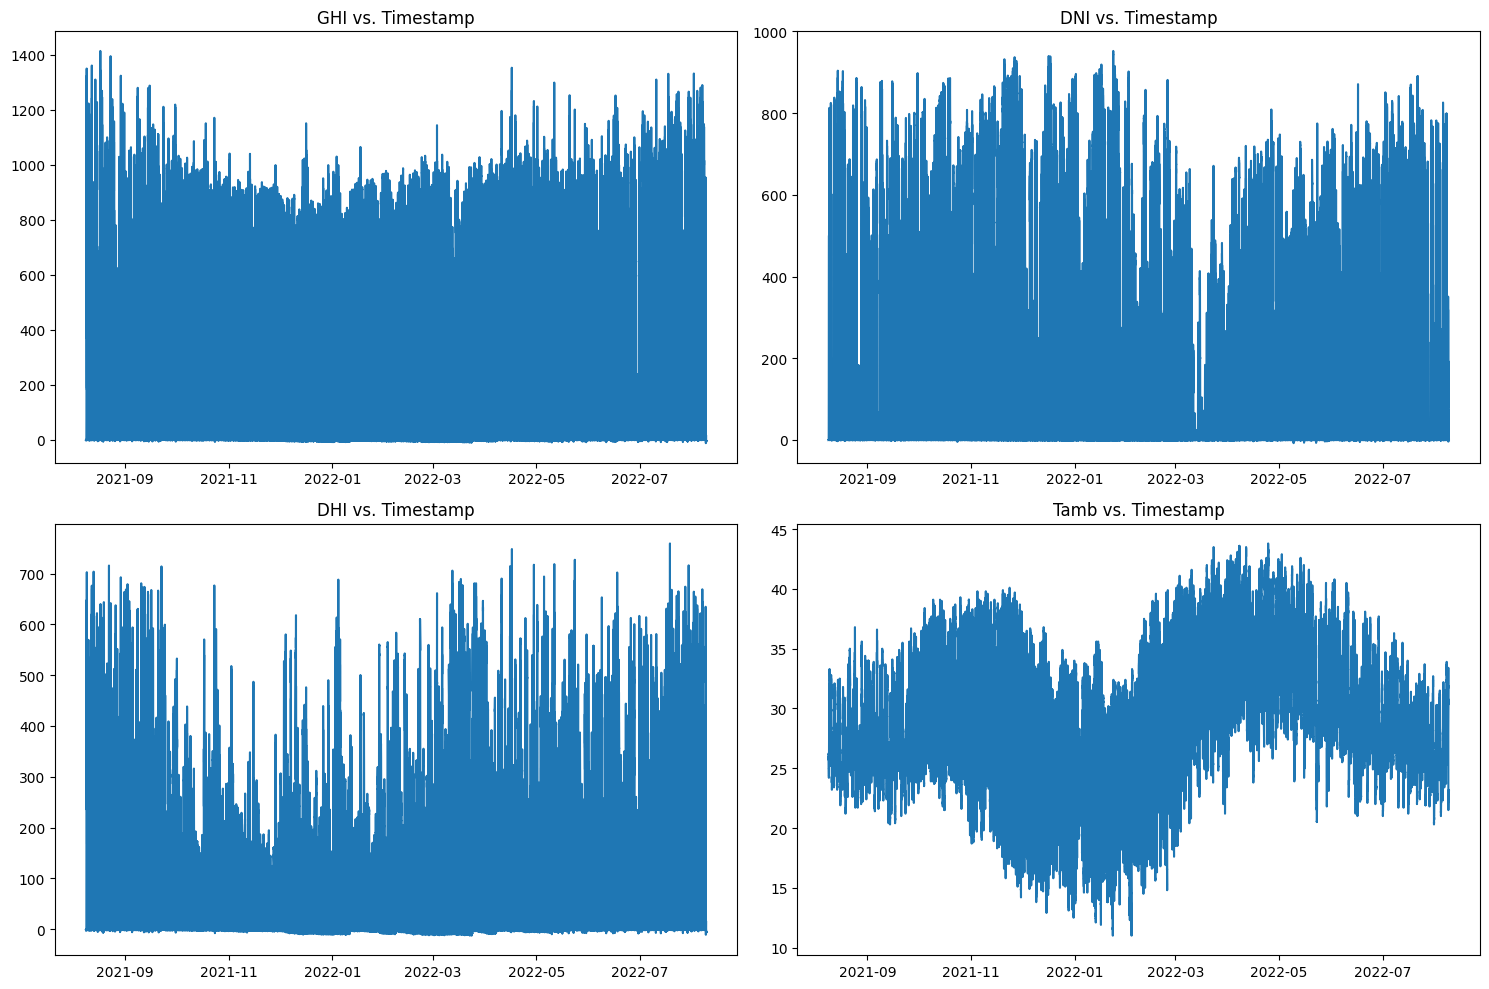


Monthly Average Statistics:
               GHI         DNI         DHI       Tamb
Month                                               
1      236.127899  223.528044   85.099924  23.328141
2      261.717381  183.575208  123.602111  25.814008
3      246.681272  101.955347  159.999859  31.699034
4      268.759785  160.630734  134.699329  33.773639
5      256.238629  147.091293  135.635515  32.495177
6      232.787537  144.552778  118.637521  29.332551
7      222.814444  130.135970  121.314397  27.329886
8      200.085029   99.048864  122.297982  26.489048
9      222.887431  128.179900  122.124169  27.157532
10     261.379704  222.187126   95.824702  29.229462
11     249.546734  256.598667   75.578123  27.419646
12     230.113954  211.036425   89.956246  24.019283


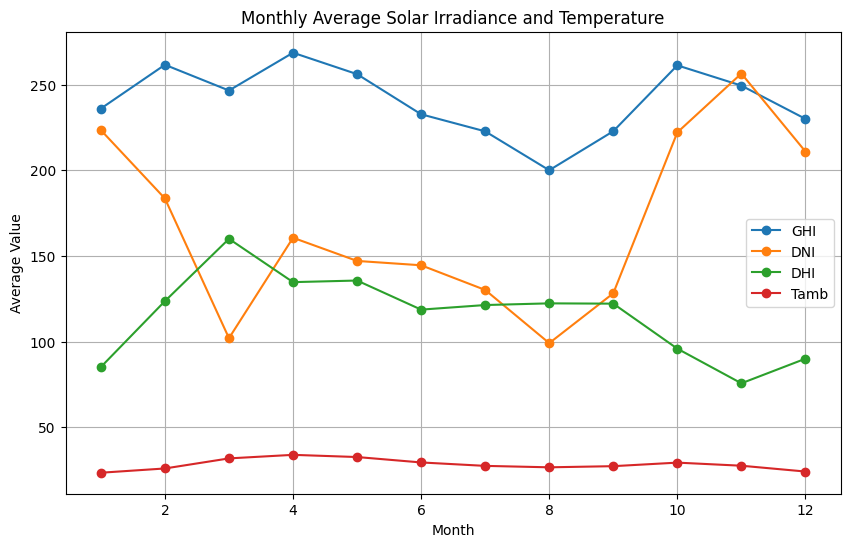


Hourly Average Statistics:
              GHI         DNI         DHI       Tamb
Hour                                               
0      -2.720489   -0.440973   -3.137635  25.065607
1      -2.668365   -0.434402   -3.082658  24.475365
2      -2.604338   -0.424457   -3.027155  23.969411
3      -2.562653   -0.415374   -2.997694  23.523689
4      -2.566968   -0.407840   -3.006055  23.151557
5      -2.552347   -0.408110   -2.996890  22.815329
6       2.884365    0.912840    2.279228  22.437616
7      82.742233   72.299142   64.748731  22.864822
8     264.109817  237.551826  162.885594  25.140539
9     462.279050  354.076064  242.170534  27.457571
10    651.065927  436.334845  309.119589  29.519822
11    776.070352  483.121361  343.839160  31.322667
12    828.205489  500.165059  355.428027  32.808799
13    811.553073  492.437082  353.377429  33.897877
14    730.639954  470.918676  328.646402  34.636379
15    581.459785  418.638379  280.808402  34.930954
16    392.096662  335.600347  211.2

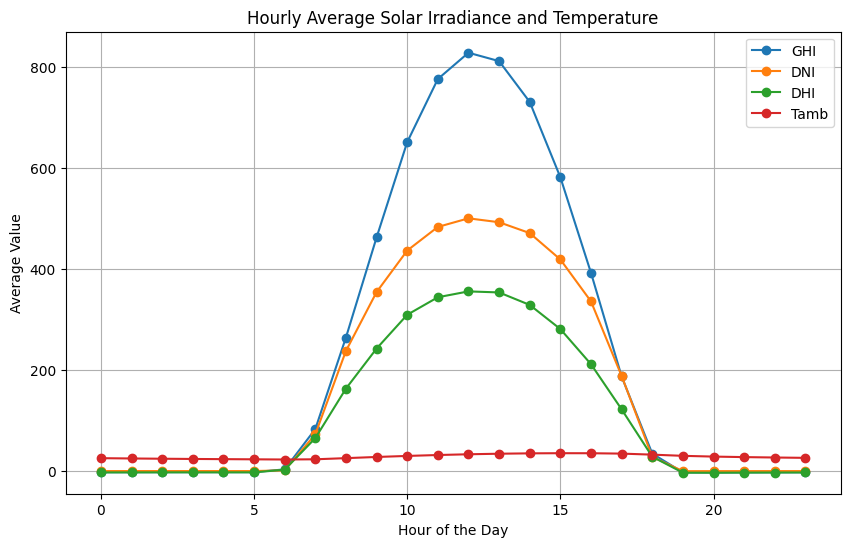

In [32]:
print("\nStep 8: Time Series Analysis")
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(dataset['Timestamp'], dataset['GHI'])
plt.title('GHI vs. Timestamp')
plt.subplot(2, 2, 2)
plt.plot(dataset['Timestamp'], dataset['DNI'])
plt.title('DNI vs. Timestamp')
plt.subplot(2, 2, 3)
plt.plot(dataset['Timestamp'], dataset['DHI'])
plt.title('DHI vs. Timestamp')
plt.subplot(2, 2, 4)
plt.plot(dataset['Timestamp'], dataset['Tamb'])
plt.title('Tamb vs. Timestamp')
plt.tight_layout()
plt.show()

dataset['Month'] = dataset['Timestamp'].dt.month
monthly_avg = dataset.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("\nMonthly Average Statistics:\n", monthly_avg)
monthly_avg.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

dataset['Hour'] = dataset['Timestamp'].dt.hour
hourly_avg = dataset.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("\nHourly Average Statistics:\n", hourly_avg)
hourly_avg.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Hourly Average Solar Irradiance and Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()



Step 9: Cleaning Impact Analysis
Cleaning Impact on Module Readings:
                 ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


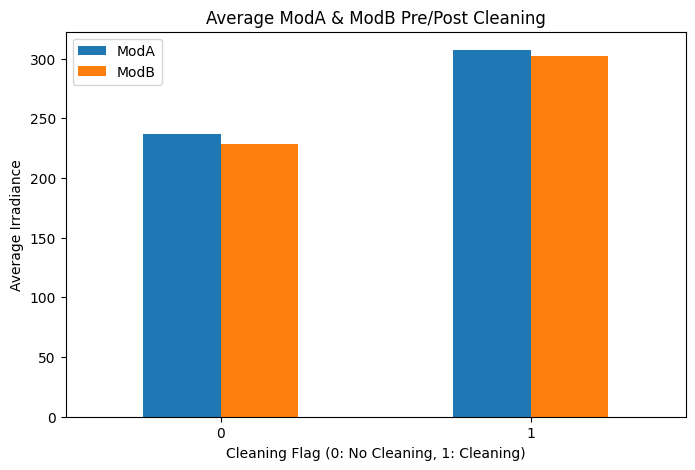

In [33]:
print("\nStep 9: Cleaning Impact Analysis")
if 'Cleaning' in dataset.columns and 'ModA' in dataset.columns and 'ModB' in dataset.columns:
    cleaning_impact = dataset.groupby('Cleaning')[['ModA', 'ModB']].mean()
    print("Cleaning Impact on Module Readings:\n", cleaning_impact)
    cleaning_impact.plot(kind='bar', figsize=(8, 5))
    plt.title('Average ModA & ModB Pre/Post Cleaning')
    plt.ylabel('Average Irradiance')
    plt.xlabel('Cleaning Flag (0: No Cleaning, 1: Cleaning)')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("'Cleaning', 'ModA', or 'ModB' column not found, skipping Cleaning Impact analysis.")

In [34]:
print("\nStep 10: Correlation & Relationship Analysis")
correlation_matrix = dataset[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=dataset)
plt.title('WS vs. GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=dataset)
plt.title('WSgust vs. GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=dataset)
plt.title('WD vs. GHI')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=dataset)
plt.title('RH vs. Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=dataset)
plt.title('RH vs. GHI')
plt.tight_layout()
plt.show()


Step 10: Correlation & Relationship Analysis


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>


Step 11: Wind & Distribution Analysis


NameError: name 'sns' is not defined

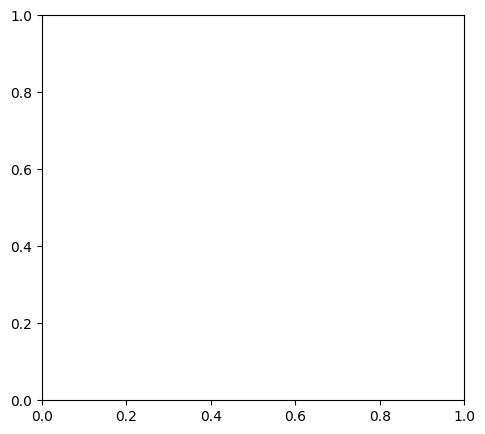

In [35]:
print("\nStep 11: Wind & Distribution Analysis")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dataset['WD'], bins=36, kde=True)
plt.title('Wind Direction Distribution')
plt.subplot(1, 2, 2)
sns.histplot(dataset['WS'], bins=20, kde=True)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(dataset['GHI'], bins=20, kde=True)
plt.title('GHI Distribution')
plt.show()

if 'WD' in dataset.columns and 'WS' in dataset.columns:
    bins = np.arange(0, 361, 30)
    labels = [f'{i}-{i+29}' for i in bins[:-1]]
    dataset['WD_bins'] = pd.cut(dataset['WD'], bins=bins, right=False, labels=labels, include_lowest=True)
    wind_rose_data = dataset.groupby('WD_bins')['WS'].count()
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    theta = np.linspace(0, 2 * np.pi, len(wind_rose_data), endpoint=False)
    width = 2 * np.pi / len(wind_rose_data)
    bars = ax.bar(theta, wind_rose_data.values, width=width, bottom=0.0)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WNW'])
    ax.set_title("Simplified Wind Rose (Frequency by Direction)", va='bottom')
    plt.show()
else:
    print("'WD' or 'WS' column not found, skipping Wind Rose.")
    